In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
!pip install split-folders

In [3]:
import splitfolders
splitfolders.ratio('CatsAndDogs', output="CatsAndDogsTTS", seed=1337, ratio=(.7, 0.2,0.1))

Copying files: 1000 files [00:06, 144.36 files/s]


In [4]:
dataset_path = "C:/Users/asad/practice/CatsAndDogsTTS"
TRAINING_DATA_DIR="C:/Users/asad/practice/CatsAndDogsTTS/train"
VALID_DATA_DIR="C:/Users/asad/practice/CatsAndDogsTTS/val"
Test_Data_DIR="C:/Users/asad/practice/CatsAndDogsTTS/test"

In [6]:
IMAGE_SHAPE = (256, 256) # (height, width) in no. of pixels

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                brightness_range=(0.5,0.8),
                                                                rotation_range=30)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
class_mode='binary',
shuffle=True,
target_size=IMAGE_SHAPE)

Found 700 images belonging to 2 classes.


In [8]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                brightness_range=(0.5,0.8),
                                                                rotation_range=30)
valid_generator = valid_datagen.flow_from_directory(
VALID_DATA_DIR,
class_mode='binary',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 200 images belonging to 2 classes.


In [9]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                               vertical_flip=True,
                                                                brightness_range=(0.5,0.8),
                                                                rotation_range=30)
test_generator = test_datagen.flow_from_directory(
Test_Data_DIR,
class_mode='binary',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 100 images belonging to 2 classes.


In [10]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
   tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128),
   tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512),
    #tf.keras.layers.Dropout(0.2),
    #For Binary Classes (i.e. Cats&Dogs)
    tf.keras.layers.Dense(1, activation='sigmoid')
    #For Multi-Class (i.e. Cats&Dogs&Birds....)
    # tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 128, 128, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 64, 64, 64)       

In [20]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

In [ ]:
from tensorflow.keras.optimizers import SGD

optimizer = "SGD"
model.compile(
 optimizer=optimizer,
 loss="binary_crossentropy",
 #For MultiClass use categorical_crossentropy
 #For Binary Class use binary_crossentropy

 metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=8)

history = model.fit(train_generator, validation_data=valid_generator, epochs=30, callbacks=callback,steps_per_epoch=steps_per_epoch,validation_steps=val_steps_per_epoch).history

Epoch 1/30
22/22 [==============================] - 84s 4s/step - loss: 0.6909 - accuracy: 0.5143 - val_loss: 0.6927 - val_accuracy: 0.4950
Epoch 2/30
22/22 [==============================] - 78s 4s/step - loss: 0.6931 - accuracy: 0.5286 - val_loss: 0.6899 - val_accuracy: 0.5200
Epoch 3/30
22/22 [==============================] - 77s 4s/step - loss: 0.6914 - accuracy: 0.5314 - val_loss: 0.6903 - val_accuracy: 0.5750
Epoch 4/30
22/22 [==============================] - 78s 4s/step - loss: 0.6923 - accuracy: 0.5186 - val_loss: 0.6878 - val_accuracy: 0.5700
Epoch 5/30
22/22 [==============================] - 79s 4s/step - loss: 0.6905 - accuracy: 0.5214 - val_loss: 0.6872 - val_accuracy: 0.5300
Epoch 6/30
22/22 [==============================] - 78s 4s/step - loss: 0.6911 - accuracy: 0.5057 - val_loss: 0.6830 - val_accuracy: 0.5400
Epoch 7/30
22/22 [==============================] - 78s 4s/step - loss: 0.6891 - accuracy: 0.5329 - val_loss: 0.6801 - val_accuracy: 0.5500
Epoch 8/30
22/22 [==

In [19]:
accuracy = history['accuracy']
val_accuracy  = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

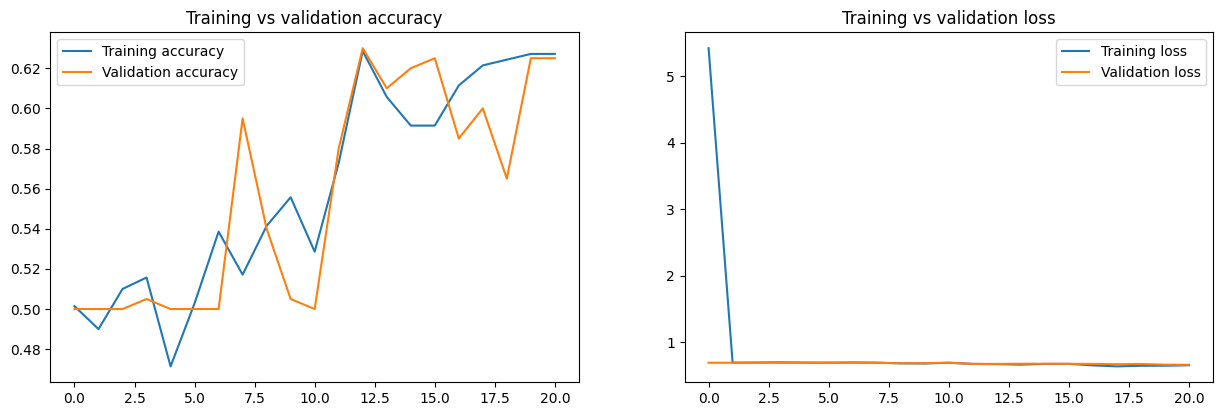

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [22]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/CatsAndDogsTTS/test/Cat/107.png')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result)


# entry point, run the example
run_example()

1/1 [==============================] - 0s 38ms/step
[[9.769607e-18]]


In [ ]:
model.save("./CatsAndDogs.h5")